<a href="https://colab.research.google.com/github/phzfi/ai-course/blob/main/nn/RNN-delay-buffer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np

def generate_delay_data(seq_length=10, num_sequences=10000):
    X = np.random.randint(0, 2, (num_sequences, seq_length, 1))
    Y = np.column_stack((np.zeros((num_sequences, 2, 1)), X[:,:-2,:]))
    return X, Y

# Generate data
X, Y = generate_delay_data()
print("Input sequences:\n", X[:2].reshape(2,10))
print("Output sequences:\n", Y[:2].reshape(2,10))
print(Y.shape)


Input sequences:
 [[0 1 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 1 0 1 0]]
Output sequences:
 [[0. 0. 0. 1. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]]
(10000, 10, 1)


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed

model = Sequential([
    LSTM(3, input_shape=(None, 1), return_sequences=True),
    TimeDistributed(Dense(1, activation='sigmoid'))
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, None, 3)           60        
                                                                 
 time_distributed_20 (TimeD  (None, None, 1)           4         
 istributed)                                                     
                                                                 
Total params: 64 (256.00 Byte)
Trainable params: 64 (256.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
history = model.fit(X, Y, epochs=10, batch_size=50, verbose=1, validation_split=0.1)

Epoch 1/10
180/180 [==============================] - 1s 4ms/step - loss: 0.0916 - accuracy: 1.0000 - val_loss: 0.0816 - val_accuracy: 1.0000
Epoch 2/10
180/180 [==============================] - 1s 4ms/step - loss: 0.0745 - accuracy: 1.0000 - val_loss: 0.0669 - val_accuracy: 1.0000
Epoch 3/10
180/180 [==============================] - 1s 4ms/step - loss: 0.0615 - accuracy: 1.0000 - val_loss: 0.0556 - val_accuracy: 1.0000
Epoch 4/10
180/180 [==============================] - 1s 4ms/step - loss: 0.0514 - accuracy: 1.0000 - val_loss: 0.0468 - val_accuracy: 1.0000
Epoch 5/10
180/180 [==============================] - 1s 5ms/step - loss: 0.0435 - accuracy: 1.0000 - val_loss: 0.0399 - val_accuracy: 1.0000
Epoch 6/10
180/180 [==============================] - 1s 6ms/step - loss: 0.0372 - accuracy: 1.0000 - val_loss: 0.0343 - val_accuracy: 1.0000
Epoch 7/10
180/180 [==============================] - 1s 6ms/step - loss: 0.0322 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 

In [60]:
# Evaluate the model
loss, accuracy = model.evaluate(X, Y, verbose=0)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Test the model with some sequences
test_sequences, test_labels = generate_delay_data(num_sequences=5)
predictions = model.predict(test_sequences)

print("Test sequences:")
print(test_sequences.reshape(5,10))
print("\nPredictions (rounded):")
print(np.round(predictions.reshape(5,10)).astype(int))
print("\nActual:")
print(test_labels.reshape(5,10).astype(int))


Accuracy: 100.00%
1/1 [==============================] - 0s 19ms/step
Test sequences:
[[0 1 1 1 0 0 0 0 0 1]
 [1 0 0 0 0 1 1 0 0 0]
 [0 0 1 0 0 1 1 0 0 0]
 [1 0 1 1 0 1 1 0 1 0]
 [1 1 1 0 1 1 1 1 1 0]]

Predictions (rounded):
[[0 0 0 1 1 1 0 0 0 0]
 [0 0 1 0 0 0 0 1 1 0]
 [0 0 0 0 1 0 0 1 1 0]
 [0 0 1 0 1 1 0 1 1 0]
 [0 0 1 1 1 0 1 1 1 1]]

Actual:
[[0 0 0 1 1 1 0 0 0 0]
 [0 0 1 0 0 0 0 1 1 0]
 [0 0 0 0 1 0 0 1 1 0]
 [0 0 1 0 1 1 0 1 1 0]
 [0 0 1 1 1 0 1 1 1 1]]


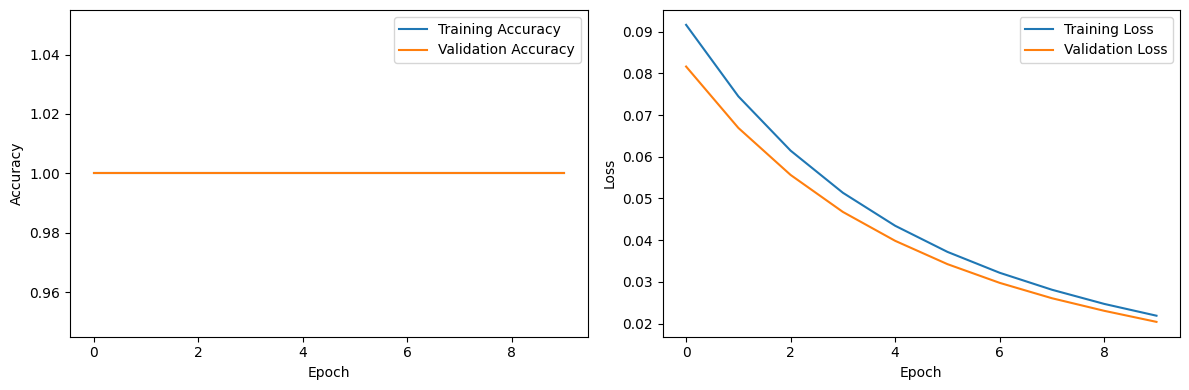

In [61]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure(figsize=(12, 4))

  # Plot accuracy
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  # Plot loss
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.tight_layout()
  plt.show()

plot_history(history)